# Scope and Lexical Closures in Python

__By Elliott Forney - 2020__

Understanding how scoping works in Python (and any language for that matter) is extremely important for writing good code and understanding exactly how other people's code works.  Yet, scoping seems to be a topic that is often not thoroughly discussed when people are learning python and often leads people to discover interesting and, perhaps, surprising behavior later on.  Having an in-depth understanding of how scoping and lexical closures work in python also provides some valuable software engineering patterns than can and should be used in a variety of common circumstances.

In this Python tutorial notebook, we will examine, in detail, how scoping works in python.  We will also describe what a lexical closure is and how it can be used to elegantly solve some common types of problems.

This tutorial is intended for audiences that already have a good core understanding of Python and would likely consider themselves to be intermediate or moderately advanced python programmers.

# Global versus local scope

As most developers are aware, the __scope__ of a variable refers to the region(s) of code where the variable is accessible.  This directly affects the lifetime of a variable because its storage may be removed once it is no longer within scope.

There are two types of variable scopes in Python: __global__ and __local__.

It's likely that the first variables you created in Python were global.  Global variables are scoped at the __module level__ and if you simply create a new variable in a script, module or Jupyter notebook, it will be global.  For example, the following variable is global.

In [1]:
global_variable = 'Hello global!'

Variables at the global scope are accesable within __any__ function, class or coding block within the same module, i.e., typically within the same file.

We can get a list of all global variables using the `globals` builtin method, which returns a dictionary of everything bound to the global scope of of the module where `globals` was called.

In [2]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['', "global_variable = 'Hello global!'", 'globals()'],
 '_oh': {},
 '_dh': ['/home/idfah/projects/notebooks/python'],
 'In': ['', "global_variable = 'Hello global!'", 'globals()'],
 'Out': {},
 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7fca018a8450>>,
 'exit': <IPython.core.autocall.ZMQExitAutocall at 0x7fc9ff9f46d0>,
 'quit': <IPython.core.autocall.ZMQExitAutocall at 0x7fc9ff9f46d0>,
 '_': '',
 '__': '',
 '___': '',
 'collections': <module 'collections' from '/usr/lib64/python3.7/collections/__init__.py'>,
 'itertools': <module 'itertools' (built-in)>,
 'os': <module 'os' from '/usr/lib64/python3.7/os.py'>,
 'sys': <module 'sys' (built-in)>,
 'np'

We can confirm that our `global_variable` above is in the current global scope by checking for its presence in the dictionary returned by the `globals` function.

In [3]:
'global_variable' in globals()

True

In [4]:
globals().get('global_variable')

'Hello global!'

If a variable is initialized within a function, it is considered a local variable (local to within the specific function where it was defined) and is accessable only within that that function, i.e., the *scope* of the variable is local to the function.

All variablels that are defined in the current local scope can be retrieved using the `locals()` builtin function, which returns a dictionary mapping variable names to variables, similar to `globals()`.  Note that the values returned by a call to `locals()` will be different depending on where it is called, since each function has its own local scope.

Below, we define a short function called that defines a single local variable and then prints all local variables with the `locals()` builtin.  This demonstrates that a locally defined varaible is within the function's local scope.

In [5]:
def test_local():
    '''A function that defines a single local variable and
    prints all local variables with the `locals` builtin.
    '''
    local_variable = 'Hello local!'
    print(locals())
    
test_local()

{'local_variable': 'Hello local!'}


Note that global variables are, of course, also accessible from within functions.

The following function prints all all global variables using the `globals()` builtin, which demonstrates that global variables are accessible from within a function.

In [6]:
def test_global():
    '''A function that prints all global variables with
    the `globals` builting.  This demonstrates that global
    variables are also accessable from within a function.
    '''
    print(global_variable)
    
test_global()

Hello global!


## Beware of overriding global variables with local variables

Note, however, if we attempt to redefine a global variable from within a function, where newly defined variables are placed in the local scope, then we will actually override the global variable with a different variable in local scope!

This can lead to some surprising behavior that Python developers should be aware of.  Fortunately, the `global` keyword is available to allow us to redefine global variables from within a function.

To demonstrate this consider the following function that defines a variable named `global_variable`, which is the same name as the global variable we defined above.

In [7]:
def test_local_over_global():
    '''Define a variable named `global_variable` from within a function.
    Although this variable has the same name as the `global_variable` defined
    in the global scope above, it will still be placed in the local scope.
    '''
    global_variable = 'Hello world!'
    print(global_variable)
    
test_local_over_global()

Hello world!


Despite the fact that we are able to successfully redefine this variable, we can verify that `global_variable` was not changed in the global scope by printing the variable outside of the function.

In [8]:
global_variable

'Hello global!'

This behavior is actually desired and prevents developers from accidentally changing global variables by choosing the same variable names at the local scope.

Python does, however, provide the `global` keyword that allows us to explicitly choose to modify a global variable from within a function, without creating a local variable with the same name.

The usage of the `global` keyword is demonstrated below.  We simple need to specify that the variable we will be referring to is, intentionally, the variable at the global scope. 

In [9]:
def test_set_global_in_local():
    '''Use the `global` keyword to explicitly denote that we want to
    modify `global_variable` at the global scope instead of creating
    a new variable in the current local scope.
    '''
    global global_variable
    global_variable = 'Hello global with a new value!'

In [10]:
test_set_global_in_local()
print(global_variable)

Hello global with a new value!


Note, however, that this should be relatively rare for a developer to want to modify a global variable from within a function.  Instead, your code will generally be much more maintainable if your functions have few side effects and instead return values that are placed in global variables externally.

# Lexical scoping

As programmers who use modern programming languages, we are all familiar with lexical scoping; however, we may not all be familiar with the terminology, or have forgotten it from a long ago programming course.

In simple terms, __lexical scoping is when a programming language allows variable scopes to be nested and where each nested scope is able to access variables from its parent scope__.

Many modern C-like language that developers are familiar with, e.g., `C`, `C++` and `Java`, have lexical scoping, and scope is often defined at the block level.  Consider the following example in `C`.  This simple function takes an integer value as an argument and returns `true` if the value is positive and `false` if it is not.  Although this may not be the most concise way to write this function, it serves the purpose of demonstrating lexical scoping at the block level.

Here, we have scope (a) at the functional level and then a nested scope (b) within the block under the `if` statement.  Notice that scope (b) inherits and is able to access variables within scope (a).  Specifically, we are able to access the `result` variable from within scope (b).

```c
bool is_positive(int value)
{
    // scope (a) starts here
    bool result = false;
    
    if (value >= 0) {
        // scope (b) starts here
        result = true;
        // scope (b) ends here
    }

    return result;
    // scope (a) ends here
}
```

The following example, however, *will not compile* in `C`.  This is because the varible is defined with block-level scope and is no longer available by the end of the function.

```c
// This will *not* compile!!!!
bool is_positive(int value)
{
    // scope (a) starts here
    
    if (value >= 0) {
        // scope (b) starts here
        bool result = true;
        // scope (b) ends here
    }
    else {
        // scope (c) starts here
        bool result = false;
        // scope (c) ends here
    }

    // The variable `result` is not accessible
    // because it has left scope!

    return result;
    // scope (a) ends here
}
```

To summarize, lexical scoping is simply when variable scopes are nested and where each nested level is able to access variables from the parent scope, but the parent scope is not able to access variables from the child scope once it has exited.

This is a common is C-like languages but is slighly different in Python...

# Python has lexical scoping, but not at the block level!


Python does, in fact, have lexical scoping.  Unlike `C`, `C++` and `Java`, however, local scopes in python are defined at the __function level__ instead of the block level.

In order to demonstrate this consider the following example.  Unlike our previous example in `C`, this function is perfectly valid python code.  There is only one scope level here and it is defined for the entire function, not the block.  This allows us to define define variables within code blocks.

In [11]:
def is_positive(value):
    '''Return `True` if `value` is positive or zero and `False` otherwise.
    Also, demonstrate that code blocks do not have their own scope.
    '''
    # local scope starts here
    
    if value >= 0:
        result = True
    else:
        result = False
    
    print(locals())
    return result

    # local scope ends here
    
is_positive(10)
is_positive(-10)

{'value': 10, 'result': True}
{'value': -10, 'result': False}


False

Here is another example that may feel odd to a developer that is primarily familiar with `C++` or `Java`.

Note that we are able to access `i` and `x` after the for loop has completed.  This is because these blocks do not have their own local scopes and these variables are created in the function's local scope.

In [12]:
def test_scope_after_loop(max=10):
    '''Demonstrate that code blocks under for loops do not
    have their own scope.
    '''
    for i in range(max):
        if i % 2 == 0:
            x = i *10
    
    # `i` and `x` are still available since they were
    # created in the function's local scope
    print('i:', i)
    print('x:', x)
    
test_scope_after_loop()

i: 9
x: 80


# Lexical scoping in nested functions and classes

So, if all blocks within a given function have the same scope, when does lexical scoping come into play in Python?

Local scope is defined at the function and class level in Python.  Lexical scoping becomes important when we nest functions (or classes).

In order to demonstrate this, consider the following example.  Here, we have a top-level function that, internally, defines a nested function.  The internal function has its own local scope and is able to access variables from the outer scope, i.e., lexical scoping at the function level.

In order to see this, notice that the inner function, called `evaluate_toggle` is able to access the `toggle` variable from the top-level `test_nested_scope` function, even though it is not passed as an argument; however, the top-level function is not able to see the `nested_local` variable defined from within the inner function.  This is lexical scoping.

In [13]:
def test_nested_scope(toggle=True):
    '''Return the string `'yes'` if `toggle` is `True`
    and `'no'` if `toggle` is `False`.  This function
    demonstrates lexical scoping of functions.
    '''
    def evaluate_toggle():
        '''An internal function that does the work.
        This function is able to acces `toggle`
        from the parent scope.
        '''
        if toggle:
            nested_local = 'yes'
        else:
            nested_local = 'no'
            
        # the `locals()` for the inner function includes
        # the `toggle` variable from the outer scope
        print('locals in nested func:', locals())
        return nested_local
    
    # the `locals()` for the outer function does *not*
    # include `nested_local` from the inner function
    result = evaluate_toggle()
    print('locals in outer func:', locals())
    
    return result

test_nested_scope()

locals in nested func: {'nested_local': 'yes', 'toggle': True}
locals in outer func: {'evaluate_toggle': <function test_nested_scope.<locals>.evaluate_toggle at 0x7fc97e639f80>, 'result': 'yes', 'toggle': True}


'yes'

# Lexical closures and function builders

The fact that we can nest functions in Python and that they have lexical scoping is interesting... but how is something like that actually useful?

In addition to having lexical scoping, Python also permits something called __lexical closures__.  A lexical closure is when a nested local scope is able to continue accessing variables from its parent scope, even after the parent scope has exited.  This allows us to create __function builders that are able to continue to hold on to variables from their parent scope__.

In order to see how this works, consider the following example that, again, returns `'yes'` for `True` and `'no'` for `False`.  This time, however, we are now returning the function that does the evaluation instead of the evaluation itsself.

In [14]:
def test_nested_scope(toggle=True):
    '''Create and return a function that returns `'yes'` if `toggle`
    is `True` and `'no'` if `toggle` is `False`.  This demonstrates
    a lexical closure over the variable `toggle`.
    '''
    def evaluate_toggle():
        '''This function does all the work.  Notice that it takes
        no arguments and is able to access the `toggle` variable
        from the parent scope because of lexical scoping.
        '''
        print(locals())
        return 'yes' if toggle else 'no'
    
    # return the function that does the work
    return evaluate_toggle

eval_func = test_nested_scope()

Now, the returned inner function called `evaluate_toggle` is able to access the `toggle` variable from its parent scope, just as we saw in the previous example.

What may be surprising, however, is that it can *still* access this variable even after the outer `test_nested_scope` function has exited!!

This is called a "*lexical closure* over the `toggle` variable."

In [15]:
# The returned function is *still* able to access the `toggle`
# variable even though the `test_nested_function` has exited!
eval_func1 = test_nested_scope(True)
eval_func2 = test_nested_scope(False)

eval_func1(), eval_func2()

{'toggle': True}
{'toggle': False}


('yes', 'no')

Let's now examine another example that may feel a bit more useful.

This time, we define an outer function called `adder` that takes a base value as input and returns a function that will then add a new value to the provided base value.

Here, we have a lexical closure over the variable `base_value`.

In [16]:
def adder(base_value):
    '''Return a function that will add `base_value` to a
    provided value.  This demonstrates a lexical closure
    over `base_value`.
    '''
    def adder_func(value):
        return base_value + value
    
    return adder_func

This is an example of a *function builder*, i.e., a function that builds and returns another function.  This is a useful design pattern and commonly involves lexical closures over one or more variables defined in the outer scope.

In [17]:
zero_adder = adder(0)
ten_adder = adder(10)
hundred_adder = adder(100)

zero_adder(11), ten_adder(12), hundred_adder(13)

(11, 22, 113)

# But be careful when modifying local variables!

Beware, however, the the lexical closure allows the inner function to continue accessing variables from the outer scope but __lexical closures do not create a new copy of the variable__.

This means that if the variable is later modified in the parent scope or any other function that maintains a lexical closure over the variable, its value will change everywhere.

Consider the following example that is similar to the previous `adder` example, except that we now later modify the `base_value` variable after the inner `adder_func` function is defined.

In [18]:
def adder_broken(base_value):
    def adder_func(value):
        return base_value + value
    
    base_value += 1000
    
    return adder_func

Notice that change to `base_value` is reflected in the result.  This is a common programming error when using lexical closures and function builders.

In [19]:
zero_adder = adder_broken(0)
ten_adder = adder_broken(10)
hundred_adder = adder_broken(100)

zero_adder(11), ten_adder(12), hundred_adder(13)

(1011, 1022, 1113)

Instead, if you require a copy of `base_value`, consider performing an explicit copy or providing it as a keyword argument to the inner function.

In [20]:
def adder_fixed(base_value):
    def adder_func(value, base_value=base_value):
        return base_value + value
    
    base_value += 1000
    
    return adder_func

Now, we are able to modify `base_value` later on without changing the behavior of the inner function.

In [21]:
zero_adder = adder_fixed(0)
ten_adder = adder_fixed(10)
hundred_adder = adder_fixed(100)

zero_adder(11), ten_adder(12), hundred_adder(13)

(11, 22, 113)

# Some more practical examples

So, function-level lexical scoping and function builders sounds great... but when might we actually use something like this?

Let's examine a few examples where data scientists and machine learning engineers might want to use lexical closures and function builders.

In [22]:
import numpy as np

## Weight initializers

A function builder with a lexical closure is a handy way to create a weight matrix initializer.

In this example, the outer function takes arguments specifying the parameters of the distribution from which the weights should be drawn.  The returned function then takes the shape of the matrix to create.  This way, we can define once how our weights will be created and then create many weight matrices with varying shapes.  This is a lexical closure over the variables `low` and `high`.

In [23]:
def weight_initializer(low, high):
    '''Return a function that will create initialized weight matrices
    with any provided shape and that are drawn from the random uniform
    distribution between `low` and `high`.
    '''
    spread = high - low
    def initializer(size):
        # lexical closure over `low` and `high`
        return low + spread * np.random.random(size)
    
    return initializer

We now create our weight initializer only once,

In [24]:
init_func = weight_initializer(-1, 3)

and are then able to initialize many weight matrices with different shapes.

In [25]:
init_func((3, 3))

array([[ 0.3287, -0.0215,  1.5191],
       [ 2.1268, -0.6626, -0.2422],
       [ 0.7878,  1.4827,  0.3764]])

In [26]:
init_func((2, 4))

array([[ 1.0978,  0.9552,  0.7876, -0.3654],
       [ 2.2224,  0.3066, -0.5194, -0.4609]])

## Standardizers

A similar approach can be used to create a "standardizer" to augment our input data to have zero mean and unit variance.  This is a common thing to do in machine learning, but it is extremely important that we always use the same mean and variance values, at both training and inference time, i.e., for the training, validation and test sets.

In [27]:
def init_standardizer(x, axis=0):
    '''Return a function that will shift a matrix to have
    zero mean and unit variance/standard deviation across
    rows using the mean and standard deviations extracted
    from the provided matrix `x`.
    '''
    means = x.mean(axis=axis)
    stdevs = x.std(axis=axis)

    def standardizer(x):
        # lexical closure over `means` and `stdevs`
        return (x - means) / stdevs
    
    return standardizer

In order to demonstrate this, we can create some random training and test matrices and then create a standardizer over this random training data.

In [28]:
train_data = np.random.random((300, 4))
test_data = np.random.random((300, 4))

standardizer = init_standardizer(train_data)

Now, we can apply the standardizer to each of our datasets, using the same parameters, without having to pass around `means` and `stdevs`.

In [29]:
train_data_std = standardizer(train_data)
test_data_std = standardizer(test_data)

print('train means:', train_data_std.mean(0))
print('train stdevs:', train_data_std.std(0))
print('test means:', test_data_std.mean(0))
print('test stdevs:', test_data_std.std(0))

train means: [ 1.2694e-16 -1.2360e-16 -1.6579e-16  2.9162e-16]
train stdevs: [1. 1. 1. 1.]
test means: [-0.0457  0.1971  0.0667 -0.0429]
test stdevs: [1.0371 1.0092 0.9824 0.9783]


## Making loops simpler with nested functions

In [30]:
def scale_data1(data, shift, scale):
    scaled = []
    
    for datum in data:
        datum -= shift
        datum *= scale
        scaled.append(datum)
        
    return scaled

In [31]:
data = list(range(5))

scale_data1(data, 0.5, 2.0)

[-1.0, 1.0, 3.0, 5.0, 7.0]

In [32]:
def scale_data2(data, shift, scale):
    scaled = []
    
    def scale_datum(datum):
        return (datum - shift) * scale
    
    for datum in data:
        scaled.append(scale_datum(datum))
        
    return scaled

In [33]:
scale_data2(data, 0.5, 2.0)

[-1.0, 1.0, 3.0, 5.0, 7.0]

In [34]:
def scale_data3(data, shift, scale):
    def scale_datum(datum):
        return (datum - shift) * scale
    
    return [scale_datum(datum) for datum in data]

In [35]:
scale_data3(data, 0.5, 2.0)

[-1.0, 1.0, 3.0, 5.0, 7.0]

In [36]:
def scale_data4(data, shift, scale):
    return list(map(lambda datum: (datum - shift) * scale, data))

In [37]:
scale_data4(data, 0.5, 2.0)

[-1.0, 1.0, 3.0, 5.0, 7.0]

In [38]:
big_data = list(range(10_000))

In [39]:
%timeit scale_data1(big_data, 0.75, 42.0)

954 µs ± 7.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%timeit scale_data2(big_data, 0.75, 42.0)

1.3 ms ± 3.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%timeit scale_data3(big_data, 0.75, 42.0)

988 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
%timeit scale_data4(big_data, 0.75, 42.0)

863 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Getting crazy with it:  using lexical closures to mimic classes

In [43]:
from munch import Munch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [44]:
def LinearModel(x, g):
    x1 = np.hstack((x, np.ones((x.shape[0], 1), dtype=x.dtype)))
    weights = np.linalg.pinv(x1) @ g
    
    def eval(x):
        return x @ weights[:-1] + weights[-1]
    
    def error(x, g):
        y = eval(x)
        return np.sqrt(np.mean((g - y)**2))
    
    return Munch(eval=eval, error=error)

(100, 1) (100, 1)


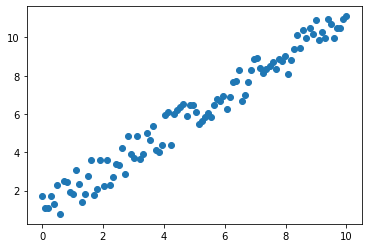

In [45]:
x = np.linspace(0.0, 10.0, 100)[:, None]
g = x + 2.0 * np.random.random(x.shape)

print(x.shape, g.shape)
plt.scatter(x, g);

In [46]:
model = LinearModel(x, g)

y = model.eval(x)
err = model.error(x, g)
err

0.5700726860782216

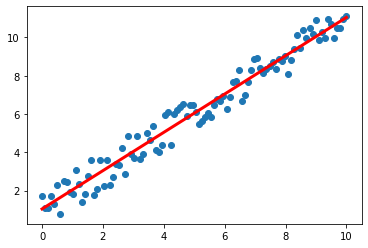

In [47]:
plt.scatter(x, g)
plt.plot(x, y, linewidth=3, color='red');

In [48]:
type(model)

munch.Munch

In [49]:
model.keys()

dict_keys(['eval', 'error'])

In [50]:
class LinearModel2:
    def __init__(self, x, g):
        x1 = np.hstack((x, np.ones((x.shape[0], 1), dtype=x.dtype)))
        self.weights = np.linalg.pinv(x1) @ g
    
    def eval(self, x):
        return x @ self.weights[:-1] + self.weights[-1]
    
    def error(self, x, g):
        y = self.eval(x)
        return np.sqrt(np.mean((g - y)**2))

In [51]:
model2 = LinearModel2(x, g)

y = model2.eval(x)
err = model2.error(x, g)
err

0.5700726860782216

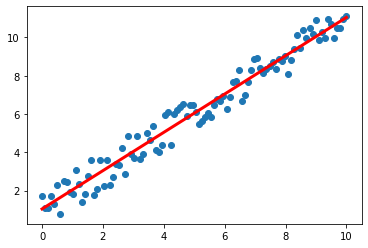

In [52]:
plt.scatter(x, g)
plt.plot(x, y, linewidth=3, color='red');

# Recap

* In Python, there is a module-level "global" scope and local scopes for each function.
* Variables in the current global and local scopes can be retrieved with the `globals()` and `locals()` builtin functions, respectively.
* In order to modify a global variable from within a function, you must use the `global` keyword.
* Local scoping is lexical, i.e, inherits parent scope, but this is done at the __funcion__ level, not the block level like in many other languages.
* Note that functions (and classes) can be nested in Python.
* Lexical closures are when a returned function retains variables from its parent scope, even after the parent function has returned.
* Lexical closures allow the use of function (and class) builders that store variables from the parent scope.
* Nested functions and lexical closures are an elegant design pattern for solving some types of problems.